### Prophet

- [Facebook Prophet](https://facebook.github.io/prophet/)은 시간에 따른 데이터를 분석하고 예측하기 위한 **시계열 모델링 라이브러리**.
- 비즈니스/웹 트래픽/매출 등의 **계절성 있는 시계열**
- **결측값**, **비정상적 추세**, **공휴일 효과** 등 현실적인 상황 반영
- 통계 지식 없이도 손쉽게 시계열 예측 가능

### Prophet의 기본 모델 구조

Prophet은 시계열 데이터를 다음과 같이 분해:



y(t) = g(t) + s(t) + h(t) + εₜ

---
| 구성 요소 | 설명 |
|-----------|------|
| `g(t)`    | **추세(Trend)**: 시간에 따른 전반적인 상승/하락 패턴 |
| `s(t)`    | **계절성(Seasonality)**: 주기적으로 반복되는 요인 (예: 주간/연간) |
| `h(t)`    | **휴일 효과(Holiday)**: 특정 이벤트(공휴일, 명절 등)의 영향 |
| `εₜ`      | **오차항** (noise): 예측 불가능한 부분 |

---

###  주요 기능 및 설정

| 기능 | 설명 |
|------|------|
| `add_seasonality()` | 사용자 정의 계절성 (예: 월별, 시간대별 등) 추가 |
| `add_regressor()` | 외부 변수(예: 온도, 광고비 등)를 회귀 변수로 추가 |
| `holidays`         | 사용자 정의 이벤트 효과 반영 (명절, 세일 등) |
| `make_future_dataframe()` | 예측 기간 설정 (향후 며칠 예측할지) |

---

### 추세 모델 종류

Prophet은 두 가지 추세(Trend) 모델을 지원:

1. **선형 추세(linear)** – 직선적 증가/감소
2. **로지스틱 추세(logistic)** – 포화 수준(capacity)을 갖는 S자 곡선

- 예
 - Prophet(growth='linear')         # 기본값
 - Prophet(growth='logistic')       # 예: 인구, 가입자 수 예측


### 계절성 구성 요소 (자동 + 수동)
Prophet은 다음 계절성을 자동으로 탐지:
- daily_seasonality (일간 주기) – 기본 비활성
- weekly_seasonality (요일별) – 기본 활성
- yearly_seasonality (연간 주기) – 기본 활성
- 수동 추가 시
- model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

### 예측 결과 해석
- model.predict(df) 실행 시 결과에는 다음 컬럼 포함:
 - ds	날짜 (datetime)
 - yhat	예측값
 - yhat_lower, yhat_upper	예측 신뢰 구간
 - trend	전체 추세 구성요소
 - weekly, yearly, ...	계절성 구성요소들

In [2]:
!unzip malgun.zip

Archive:  malgun.zip
  inflating: malgun.ttf              


In [3]:
import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리

fe = fm.FontEntry(fname=r'malgun.ttf', name='malgun') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'malgun'}) #폰트설정

In [4]:
!pip install prophet
!pip install --upgrade pandas  # pandas 버전 문제 방지


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 94.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.1 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.1 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.1 which is incompatible.


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcf1gph_1/iccguwxg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcf1gph_1/hs0fmjyg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39298', 'data', 'file=/tmp/tmpcf1gph_1/iccguwxg.json', 'init=/tmp/tmpcf1gph_1/hs0fmjyg.json', 'output', 'file=/tmp/tmpcf1gph_1/prophet_model6ckojbeh/prophet_model-20250803153249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:32:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:32:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


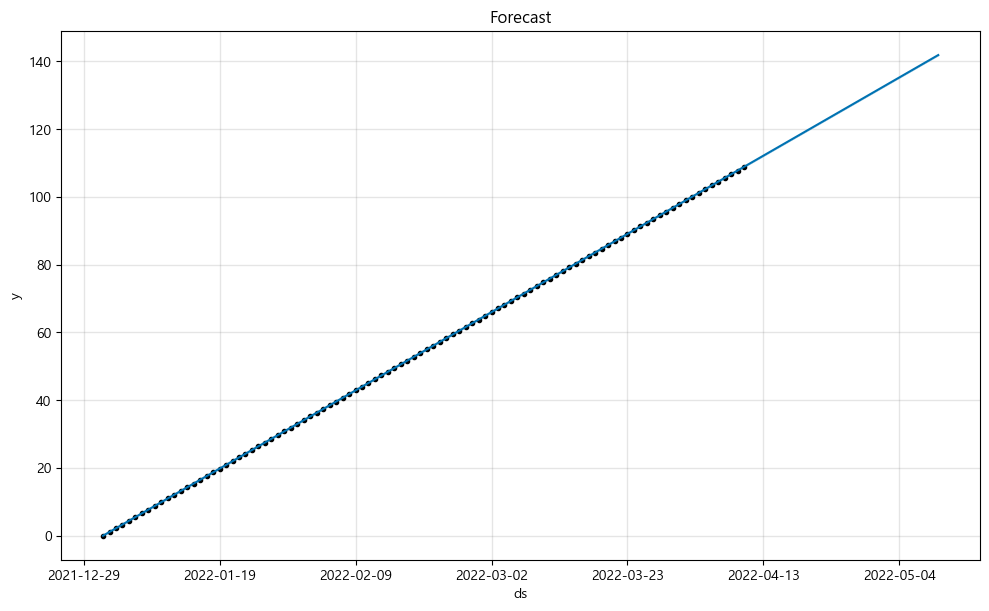

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:197: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


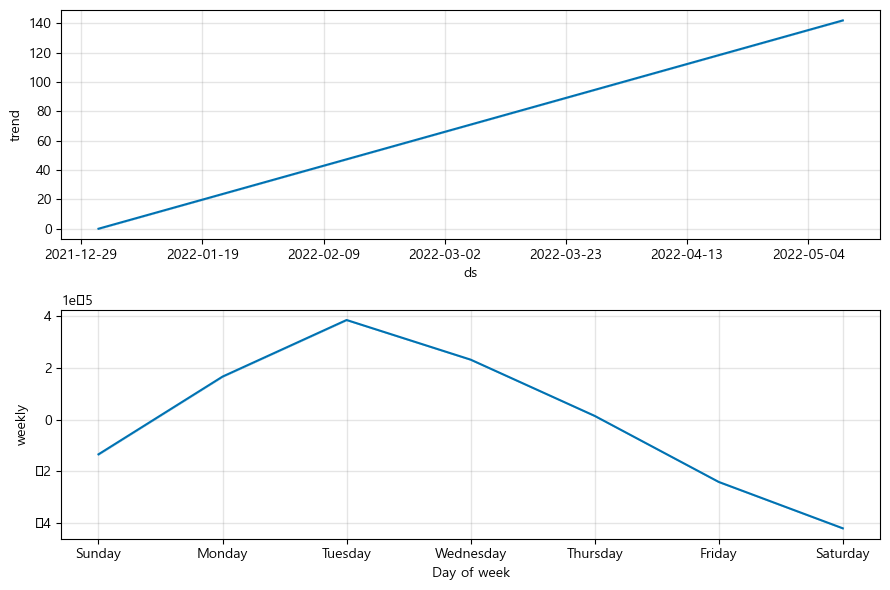

In [5]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. 시계열 데이터 생성 (예: 매출)
df = pd.DataFrame({
    'ds': pd.date_range(start='2022-01-01', periods=100, freq='D'),
    'y': [x + (x * 0.1) for x in range(100)]  # 예: 선형 증가
})

# 2. 모델 생성 및 학습
model = Prophet()
model.fit(df)

# 3. 미래 데이터프레임 생성 (30일 예측)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# 4. 결과 시각화
fig1 = model.plot(forecast)
plt.title("Forecast")
plt.show()

# 5. 구성 요소 분석 (추세, 주기 등)
fig2 = model.plot_components(forecast)
plt.show()


- ds: 날짜 컬럼 (datetime 타입)

- y: 예측할 값 (연속형)

- model.make_future_dataframe(periods=30): 앞으로 30일 예측

- model.plot_components(): 추세 및 계절성 확인

In [6]:
!pip install pykrx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 21.2 MB/s eta 0:00:00


In [11]:
from pykrx import stock

data = stock.get_market_ohlcv_by_date("20250101", "20250630", "005930")
data.head()

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2025-01-02,52700,53600,52300,53400,16630538,0.375940
2025-01-03,52800,55100,52800,54400,19318046,1.872659
2025-01-06,54400,56200,54300,55900,19034284,2.757353
2025-01-07,56800,57300,55400,55400,17030235,-0.894454
2025-01-08,54800,57500,54700,57300,26593553,3.429603


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcf1gph_1/7f12v00m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcf1gph_1/fegluy0p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16479', 'data', 'file=/tmp/tmpcf1gph_1/7f12v00m.json', 'init=/tmp/tmpcf1gph_1/fegluy0p.json', 'output', 'file=/tmp/tmpcf1gph_1/prophet_model09tvegmy/prophet_model-20250803153510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:35:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:35:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


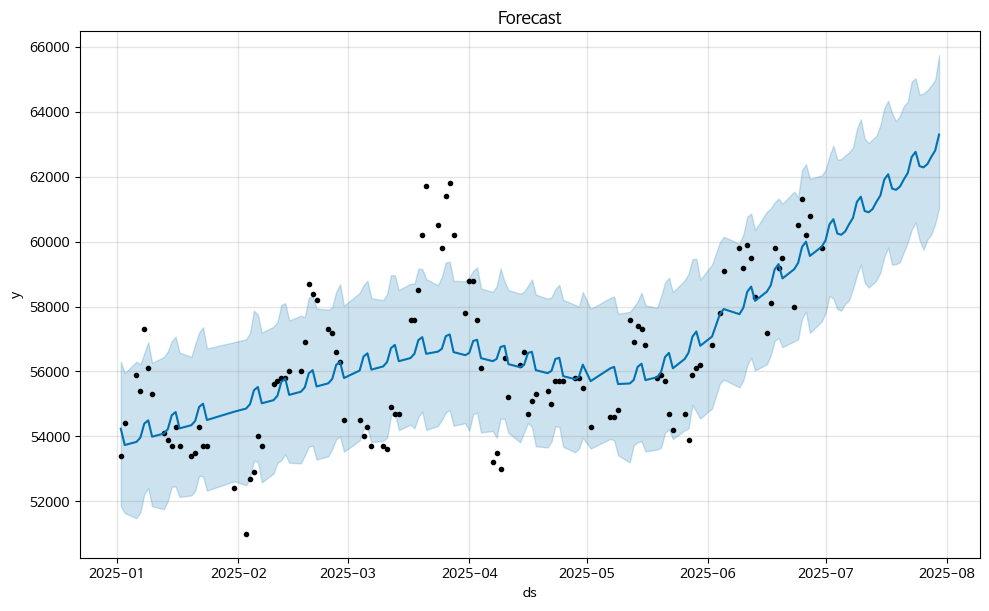

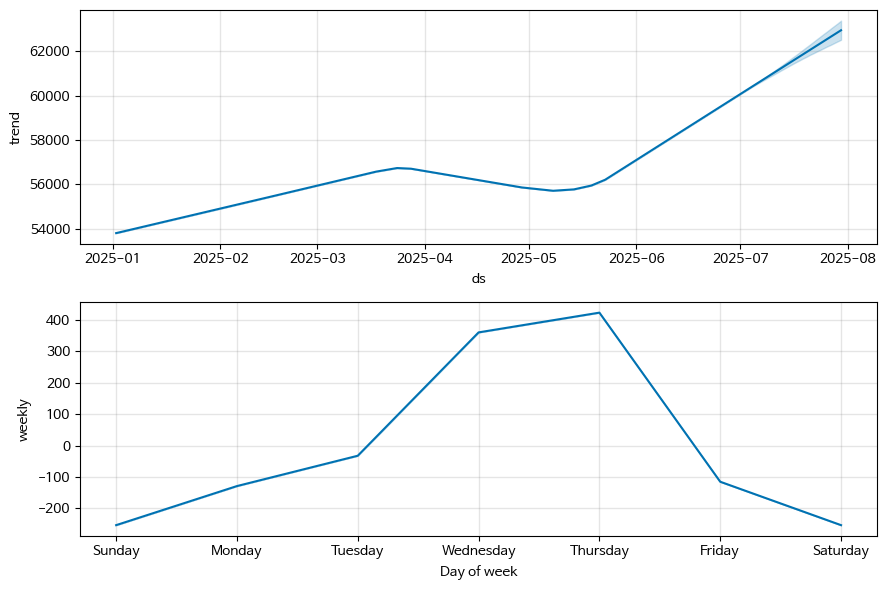

In [12]:
# 1. 데이터 준비
df = pd.DataFrame({
    'ds': data.index,
    'y': data['종가']
})

# 2. 모델 생성 및 학습
model = Prophet()
model.fit(df)

# 3. 미래 데이터프레임 생성 (30일 예측)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# 4. 결과 시각화
fig1 = model.plot(forecast)
plt.title("Forecast")
plt.show()

# 5. 구성 요소 분석 (추세, 주기 등)
fig2 = model.plot_components(forecast)
plt.show()

- weekly_seasonality=False 후 add_seasonality()로 직접 요일 효과를 조정 가능
- yearly_seasonality=False 후 월별 효과도 수동으로 반영
- fourier_order는 계절 패턴의 복잡도 (값이 클수록 유연)
 - 낮은 값 (2~4)	부드러운, 단순한 주기성
 - 높은 값 (10~20)	더 세밀하고 복잡한 주기성 감지

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcf1gph_1/bvno4_ia.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcf1gph_1/m80kt3mq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85492', 'data', 'file=/tmp/tmpcf1gph_1/bvno4_ia.json', 'init=/tmp/tmpcf1gph_1/m80kt3mq.json', 'output', 'file=/tmp/tmpcf1gph_1/prophet_modelq2b76ndz/prophet_model-20250803154656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:46:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:46:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


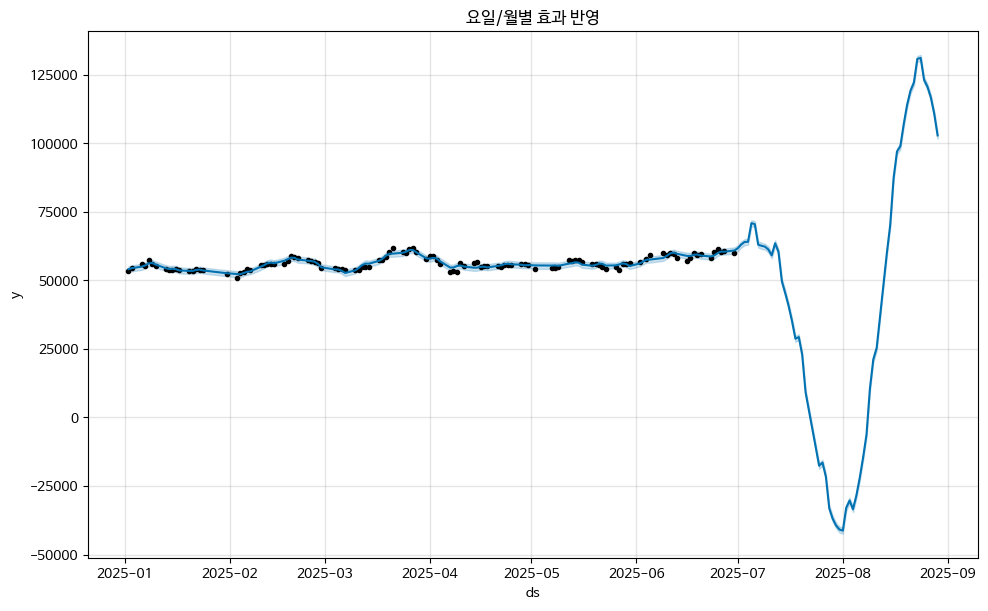

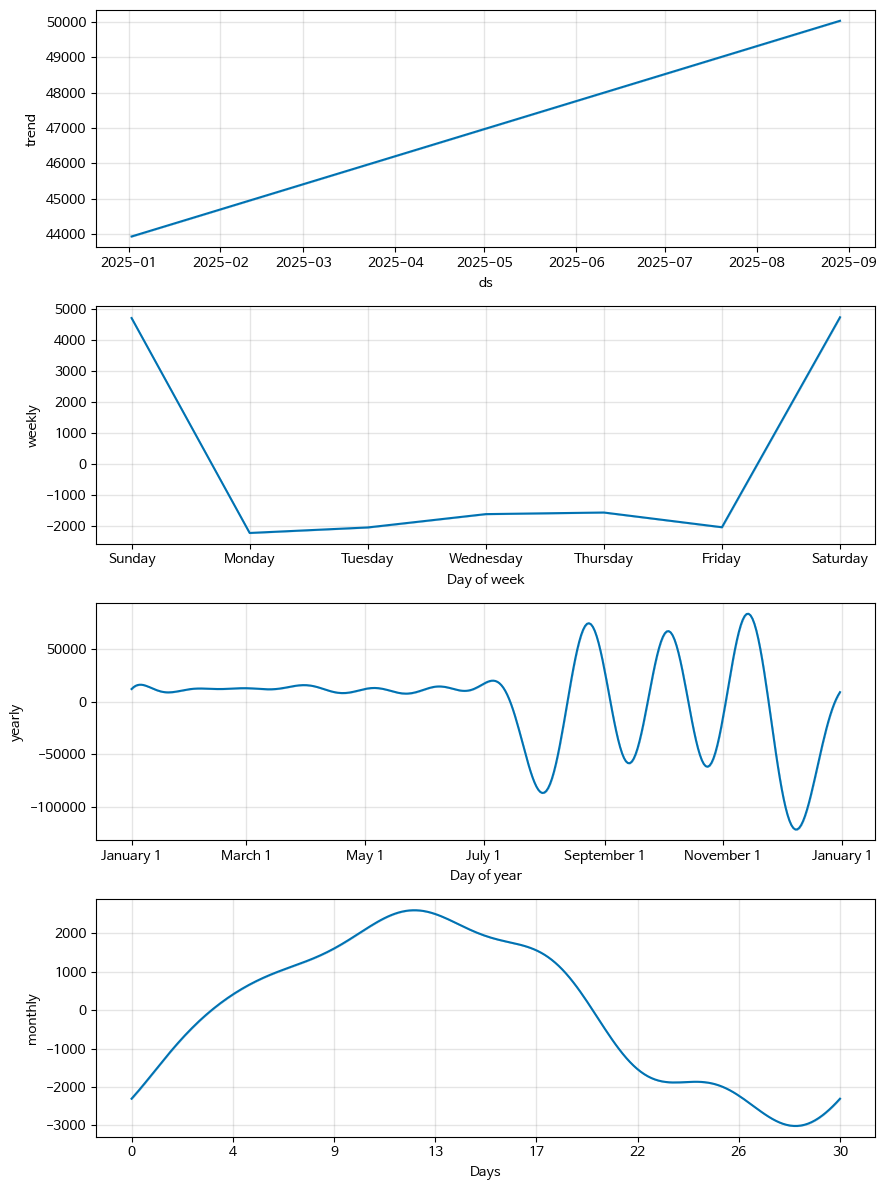

In [25]:
# Prophet 모델 설정: 요일/월별 계절성 수동 추가
model = Prophet(
    weekly_seasonality=False,  # 기본 요일 계절성 제거 후 수동 추가
    yearly_seasonality=False   # 기본 연간 계절성 제거 후 수동 추가
)
model.add_seasonality(name='weekly', period=7, fourier_order=4)
model.add_seasonality(name='yearly', period=365.25, fourier_order=10)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

model.fit(df)

# 미래 데이터 생성 및 예측
future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)

# 예측 결과 시각화
model.plot(forecast)
plt.title("요일/월별 효과 반영")
plt.show()

#  구성 요소 시각화 (trend, weekly, yearly 등)
model.plot_components(forecast)
plt.show()